<a href="https://colab.research.google.com/github/jhonygiraldo/Series-Machine-Learning/blob/master/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [411]:
# Creación de hiperplano y datos sintéticos
import numpy as np  # Librería numpy para manejo de vectores y matrices

w_1 = np.random.uniform(-1,1) # Generar peso aleatorio
w_2 = np.random.uniform(-1,1) # Generar peso aleatorio
w_3 = np.random.uniform(-1,1) # Generar peso aleatorio
while abs(w_3) > abs(w_2):    # Condición para obtener un hiperplano en dos dimensiones entre [-1, 1]
  w_3 = np.random.uniform(-1,1)
print([w_1,w_2,w_3])

[0.9037929518427181, 0.3759442090596996, -0.2198116836916859]


(-1.0, 1.0)

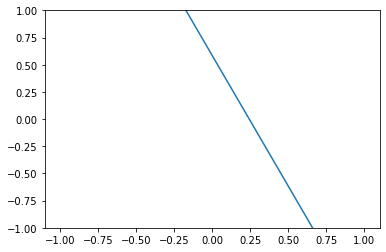

In [412]:
import matplotlib.pyplot as plt # Librería para graficar

# w_1*x_1 + w_2*x_2 + w_3*1 = 0 -> x_2 = (-w_1*x_1-w_3)/w_2;
x_1 = np.linspace(-1, 1, num=100) # Espacio lineal entre [-1, 1]
x_2 = (-w_1*x_1-w_3)/w_2; # Ecuación de la recta
plt.plot(x_1, x_2)        # Graficar recta
plt.ylim([-1, 1])         # Limitar la visión entre [-1, 1]

(-1.0, 1.0)

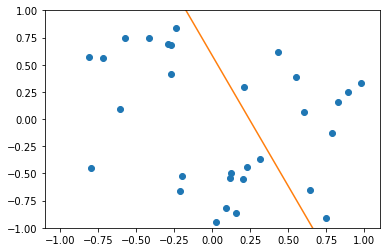

In [413]:
num_datos = 30  # Número de datos sintéticos ¡AUMENTE Y DISMINUYA ESTE NÚMERO PARA OBSERVAR EL EFECTO EN LA GRÁFICA FINAL!
datos = np.random.uniform(-1,1,[num_datos,2]) # Puntos aleatorios en el plano de 2 dimensiones entre [-1, 1]
plt.plot(datos[:,0], datos[:,1], 'o') # Graficar puntos
plt.plot(x_1, x_2)  # Graficar plano
plt.ylim([-1, 1])   # Limitar visualización del plano

In [414]:
x = np.c_[datos, np.ones((num_datos,1))] # Adjuntar una columna de unos
print(x.shape)

(30, 3)


In [415]:
x = np.transpose(x) # Transpuesta de la matrix x
print(x.shape)

(3, 30)


In [416]:
w = np.array([w_1, w_2, w_3]) # Crear un vector para multiplicación matricial
w.shape = (3,1) # Convertir w en un vector columna
print(w.shape)

(3, 1)


In [417]:
# Salidas del modelo
y = np.matmul(np.transpose(w),x) # Multiplicación entre vector de pesos y datos
y = np.sign(y) # Salida con función signo
print(y.shape)

(1, 30)


(-1.0, 1.0)

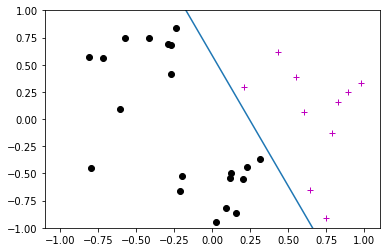

In [418]:
class_1_indx = np.where(np.equal(-1*np.ones(y.shape),y))[1] # Indices clase 1
class_2_indx = np.where(np.equal(np.ones(y.shape),y))[1]    # Indices clase 2
# Plot
plt.plot(datos[class_1_indx,0], datos[class_1_indx,1], 'ko')  # Graficar los puntos de la clase 1
plt.plot(datos[class_2_indx,0], datos[class_2_indx,1], 'm+')  # Graficar los puntos de la clase 2
plt.plot(x_1, x_2)  # Graficar hiperplano
plt.ylim([-1, 1])

In [0]:
# Perceptron
w_train = np.random.uniform(-1,1,[3,1]) # Crear pesos aleatorios para empezar a entrenar
y_train = np.sign(np.matmul(np.transpose(w_train),x)) # Clasificación con pesos actuales
indx_missclassified = np.where(np.not_equal(y,y_train))[1]  # Indices de puntos mal clasificados
iterations = 1;

In [0]:
while indx_missclassified.shape[0] > 0:
  x_temp = x[:,indx_missclassified[0]]  # Se escoge uno de los datos mal clasificado
  x_temp.shape = [3,1]  # Convertir x_temp en un vector columna
  w_train = w_train + y[0,indx_missclassified[0]]*x_temp  # Formula de actualización de pesos
  y_train = np.sign(np.matmul(np.transpose(w_train),x))   # Clasificación con pesos actuales
  indx_missclassified = np.where(np.not_equal(y,y_train))[1]  # Indices de puntos mal clasificados
  iterations += 1

Numero de iteraciones: 20


(-1.0, 1.0)

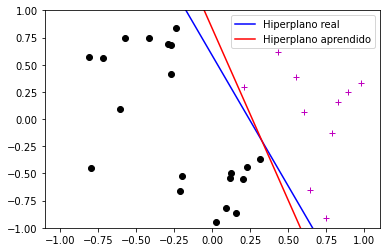

In [421]:
print('Numero de iteraciones: '+str(iterations))
x_2_train = (-w_train[0]*x_1-w_train[2])/w_train[1] # Hiperplano entrenado
# Plot
plt.plot(x_1, x_2, 'b')
plt.plot(x_1, x_2_train, 'r')
plt.legend(['Hiperplano real', 'Hiperplano aprendido'])
plt.plot(datos[class_1_indx,0], datos[class_1_indx,1], 'ko')
plt.plot(datos[class_2_indx,0], datos[class_2_indx,1], 'm+')
plt.ylim([-1, 1])